# Explore Training Curves

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,5)

In [3]:
def find_moving_avg(data, window_size):
    if data.shape[0] == 1:
        quantile1 = np.zeros(data.shape[1]-window_size)
        quantile2 = np.zeros(data.shape[1]-window_size)
        avg = np.zeros(data.shape[1]-window_size)
        for i in range(data.shape[1]-window_size):
            avg[i] = np.mean(data[0,i:i+window_size])
            quantile1[i] = np.quantile(data[0,i:i+window_size], 0.25)
            quantile2[i] = np.quantile(data[0,i:i+window_size], 0.75)
        return avg, quantile1, quantile2
    else:
        std = np.std(data,axis=0)
        avg = np.mean(data,axis=0)
        smoothed_avg = np.zeros(data.shape[1]-window_size)
        smoothed_std = np.zeros(data.shape[1]-window_size)
        # smooth 
        for i in range(data.shape[1]-window_size):
            smoothed_avg[i] = np.mean(avg[i:i+window_size])
            smoothed_std[i] = np.mean(std[i:i+window_size])
        return smoothed_avg, smoothed_avg-smoothed_std, smoothed_avg+smoothed_std
            

def df_plot(dfs, x, y, isTaxi, isChain, isCliff, ylim=None, xlim=None, legend_loc='best'):
    """ Plot y vs. x curves from pandas dataframe(s)

    Args:
        dfs: list of pandas dataframes
        x: str column label for x variable
        y: str column label for y variable
        ylim: tuple to override automatic y-axis limits
        xlim: tuple to override automatic x-axis limits
        legend_loc: str to override automatic legend placement:
            'upper left', 'lower left', 'lower right' , 'right' ,
            'center left', 'center right', 'lower center',
            'upper center', and 'center'
    """
    if ylim is not None:
        plt.ylim(ylim)
    if xlim is not None:
        plt.xlim(xlim)
        
    n = len(dfs)
    ws = 5
    if isTaxi == True:
        min_len = 84
        timesteps_per_eps = 70
        y_val = np.zeros((n,84))
        plt.title('Taxi', fontsize = 26)
    if isChain == True:
        min_len = 500
        timesteps_per_eps = 200
        y_val = np.zeros((n,500))
        ws = 30
        plt.title('Chain', fontsize = 26)
    if isCliff == True:
        min_len = 1000
        y_val = np.zeros((n,1000))
        timesteps_per_eps = 50
        plt.title('Cliff', fontsize = 26)
    
    i = 0
    for df, name in dfs:
        if '_' in name:
            name = name.split('_')[1]
            if 'Wass' in name:
                name = 'ODRPO-Wass'
            elif 'Sinkhorn1' in name:
                name = 'ODRPO-Sinkhorn ($\lambda$ = 1)'
            elif 'Sinkhorn20' in name:
                name = 'ODRPO-Sinkhorn ($\lambda$ = 20)'
            elif 'Sinkhorn50' in name:
                name = 'ODRPO-Sinkhorn ($\lambda$ = 50)'
            else:
                name = 'ODRPO-Sinkhorn ($\lambda$ = 2)'
        x_val = df[x]
        y_val[i,:] = df[y].values.ravel()[0:min_len]
        i += 1
                
    moving_average = find_moving_avg(y_val, ws)
    if name == 'ODRPO-Wass':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:orange')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:orange')
    if name == 'ODRPO-Sinkhorn ($\lambda$ = 1)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:grey')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:grey')
    if name == 'ODRPO-Sinkhorn ($\lambda$ = 20)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:blue')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:blue')
    if name == 'ODRPO-Sinkhorn ($\lambda$ = 50)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:pink')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:pink')
    if name == 'ODRPO-Sinkhorn ($\lambda$ = 2)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:green')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:green')
    plt.xticks(fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.axis((None,None,None,None))
    plt.xlabel('            Timesteps       '+ r'$\times 10^5$',fontsize=22)
    plt.ylabel('Average Return',fontsize=22)

In [4]:
isTaxi = False
isChain = True
isCliff = False


# ENTER LIST OF LOG FILENAMES HERE:
if isChain:
    wass_path = ['new_log_files/different_lambdas/NChain-v0_DR-Wass_Batch=1/Oct-19_07:58:22/log.csv',
                 'new_log_files/different_lambdas/NChain-v0_DR-Wass_Batch=1/Oct-19_08:05:03/log.csv']
    sink1_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn1_Batch=1/Feb-05_23:58:52/log.csv',
                   'new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn1_Batch=1/Feb-06_00:00:56/log.csv']
    sink2_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn2_Batch=1/Feb-06_00:29:43/log.csv',
                  'new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn2_Batch=1/Feb-06_00:35:56/log.csv']
    sink20_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn20_Batch=1/Feb-06_00:17:22/log.csv',
                   'new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn20_Batch=1/Feb-06_00:23:14/log.csv']
    sink50_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn50_Batch=1/Feb-06_00:57:03/log.csv',
                   'new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn50_Batch=1/Feb-06_00:55:55/log.csv']

wass_dataframes = []
wass_names = []
for filepath in wass_path:
    wass_names.append(filepath.split('/')[2])
    wass_dataframes.append(pd.read_csv(filepath))
wass_data = list(zip(wass_dataframes, wass_names))

sink1_dataframes = []
sink1_names = []
for filepath in sink1_path:
    sink1_names.append(filepath.split('/')[2])
    sink1_dataframes.append(pd.read_csv(filepath))
sink1_data = list(zip(sink1_dataframes, sink1_names))

sink2_dataframes = []
sink2_names = []
for filepath in sink2_path:
    sink2_names.append(filepath.split('/')[2])
    sink2_dataframes.append(pd.read_csv(filepath))
sink2_data = list(zip(sink2_dataframes, sink2_names))

sink20_dataframes = []
sink20_names = []
for filepath in sink20_path:
    sink20_names.append(filepath.split('/')[2])
    sink20_dataframes.append(pd.read_csv(filepath))
sink20_data = list(zip(sink20_dataframes, sink20_names))

sink50_dataframes = []
sink50_names = []
for filepath in sink50_path:
    sink50_names.append(filepath.split('/')[2])
    sink50_dataframes.append(pd.read_csv(filepath))
sink50_data = list(zip(sink50_dataframes, sink50_names))

# Plots

In [5]:
def find_baseline_moving_avg(file_list, window_size):  
    if len(file_list) == 1:
        df=pd.read_csv(file_list[0], sep=',', skiprows = 0, header= 1)
        data = df['r']
        quantile1 = np.zeros(len(data)-window_size)
        quantile2 = np.zeros(len(data)-window_size)
        avg = np.zeros(len(data)-window_size)
        for i in range(len(data)-window_size):
            avg[i] = np.mean(data[i:i+window_size])
            quantile1[i] = np.quantile(data[i:i+window_size], 0.25)
            quantile2[i] = np.quantile(data[i:i+window_size], 0.75)
        return avg, quantile1, quantile2
    else:
        # find minimum length
        min_len = 1e7
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', skiprows = 0, header= 1)
            y_val = df['r']
            cur_len = len(y_val)
            if cur_len < min_len:
                min_len = cur_len
        data = np.zeros((len(file_list), min_len))
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', skiprows = 0, header= 1)
            data[i,:] = df['r'].values.ravel()[0:min_len]
        std = np.std(data,axis=0)
        avg = np.mean(data,axis=0)
        smoothed_avg = np.zeros(min_len-window_size)
        smoothed_std = np.zeros(min_len-window_size)
        # smooth 
        for i in range(min_len-window_size):
            smoothed_avg[i] = np.mean(avg[i:i+window_size])
            smoothed_std[i] = np.mean(std[i:i+window_size])
        return smoothed_avg, smoothed_avg-smoothed_std, smoothed_avg+smoothed_std

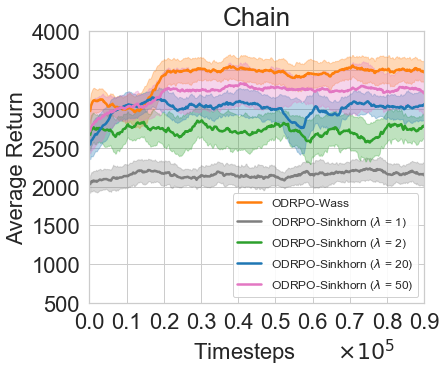

In [12]:
if isTaxi:
    xlim = 3
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [-800,0], [0,2.0])
    df_plot(sink1_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [-800,0], [0,2.0])
    df_plot(sink20_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [-800,0], [0,2.0])
if isChain:
    xlim = 6
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [500,4000], [0, 0.9])
    df_plot(sink1_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [500,4000], [0, 0.9])
    df_plot(sink2_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [500,4000], [0, 0.9])
    df_plot(sink20_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [500,4000], [0, 0.9])
    df_plot(sink50_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [500,4000], [0, 0.9])
if isCliff:
    xlim = 0.3
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [-3000,100], [0,0.3])
    df_plot(sink1_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [-3000,100], [0,0.3])
    df_plot(sink20_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [-3000,100], [0,0.3])

plt.rcParams["legend.framealpha"] = 0.9
plt.legend(fontsize=12, loc='lower right')